# **William Fussell**
## Stats & Public Health Pt.2

### Project Description:
In this deliverable we will move on to analyze the prevalence of WNV in mosquitos in Chicago. We will 


In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn import linear_model
from prettytable import PrettyTable



### EDA

In [2]:
#Import data
df = pd.read_csv('/Users/williamfussell/Documents/Brain Station Master/Brain Station VSC/CSV/mosquito_data_part_2.csv')

In [3]:
df2 = pd.read_csv('/Users/williamfussell/Documents/Brain Station Master/Brain Station VSC/CSV/mosquito_data_part_2.csv')    

In [4]:
df2

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9
...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [6]:
# replace spaces with underscores in the column names
df2.columns = df2.columns.str.replace(' ', '_')

In [7]:
# Check for missing values
df2.isna().sum()

Year               0
Week               0
Address_Block      0
Trap               0
Trap_type          0
Date               0
Mosquito_number    0
WNV_Present        0
Species            0
Lat                0
Lon                0
Month              0
dtype: int64

In [8]:
# Check for duplicate rows
df2.duplicated().sum()

658

In [9]:
# Check for duplicate columns
df2.T.duplicated().sum()

0

In [10]:
# Change the data type of the Date column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

In [11]:
# Create a new column for the day of the week
df2['Day'] = df2['Date'].dt.strftime('%a')

In [12]:
df2.head()

,Year,Week,Address_Block,Trap,Trap_type,Date,Mosquito_number,WNV_Present,Species,Lat,Lon,Month,Day
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9,Thu
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9,Thu
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9,Thu
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9,Thu
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9,Thu


### Part 1. Basic Analysis

Question 1. Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.


In [13]:
# One hot encode the 'Trap_type' column
df2 = pd.get_dummies(df2, columns=['Trap_type'], drop_first=True)

In [14]:
# Map the 'WNV_Present' column binary values
df2['WNV_Present'] = df2['WNV_Present'].map({'negative':0,'positive':1})

In [15]:
df2.head()

,Year,Week,Address_Block,Trap,Date,Mosquito_number,WNV_Present,Species,Lat,Lon,Month,Day,Trap_type_GRAVID,Trap_type_OVI,Trap_type_SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.977738,-87.880969,9,Thu,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.798211,-87.736925,9,Thu,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,0,CULEX RESTUANS,41.987245,-87.689417,9,Thu,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,0,CULEX RESTUANS,41.953664,-87.724987,9,Thu,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,0,CULEX RESTUANS,41.657069,-87.546049,9,Thu,1,0,0


Question 2. What is the average number of mosquitoes for each month? What trends do you notice?

In [16]:
# Group by 'Month' and calculate the mean of 'Mosquito_number', reset index for plotting
average_mosquitos = df2.groupby('Month')['Mosquito_number'].mean().reset_index()
average_mosquitos

,Month,Mosquito_number
0,5,2.761905
1,6,10.264442
2,7,11.551879
3,8,12.111321
4,9,8.394973
5,10,5.377778


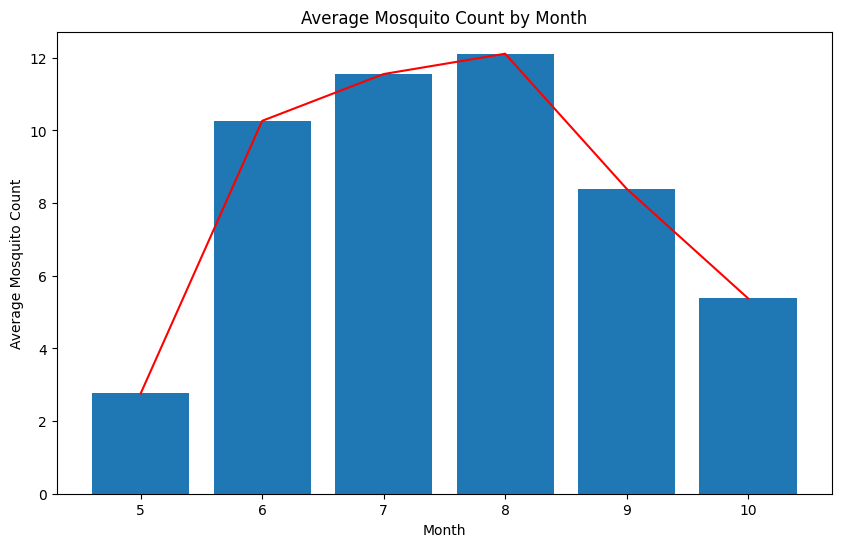

In [17]:
# Create a figure and axes with a specific size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a line plot using Seaborn
sns.lineplot(x='Month', y='Mosquito_number', data=average_mosquitos, color='red', zorder=2)

# Create a bar plot using Matplotlib
ax.bar(average_mosquitos['Month'], average_mosquitos['Mosquito_number'], zorder=1)

# Add title, x-label, and y-label to the plot
plt.title('Average Mosquito Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Mosquito Count')

# Display the plot
plt.show()

To run the model later we will need to do a few more things to get it ready for the regression. Below we will map, the Days we extracted from the 'Date' column to numbers and we will Drop 'Date','Week','Address_Block', and 'Trap' as these will no longer be necessary for our Linear Regression. We will wait to encode species until after out statistical analysis.

<AxesSubplot: >

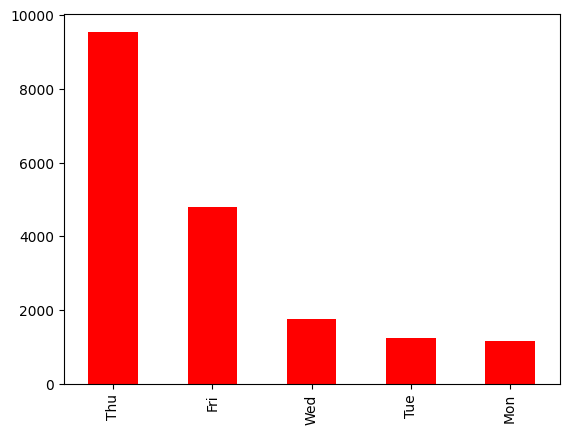

In [18]:
# Plot the distribution of the count of 'Day' using Seaborn
df2['Day'].value_counts(  ).plot(kind='bar', color='red')

In [19]:
# Map the 'Day' column to numerical values
df2['Day'] = df2['Day'].map({'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5})

In [20]:
# Drop unnecessary columns
df2.drop(['Date','Week','Address_Block','Trap'], axis=1, inplace=True)

In [21]:
df2.head()

,Year,Mosquito_number,WNV_Present,Species,Lat,Lon,Month,Day,Trap_type_GRAVID,Trap_type_OVI,Trap_type_SENTINEL
0,2019,2,0,CULEX RESTUANS,41.977738,-87.880969,9,4,1,0,0
1,2019,1,0,CULEX RESTUANS,41.798211,-87.736925,9,4,1,0,0
2,2019,2,0,CULEX RESTUANS,41.987245,-87.689417,9,4,1,0,0
3,2019,1,0,CULEX RESTUANS,41.953664,-87.724987,9,4,1,0,0
4,2019,9,0,CULEX RESTUANS,41.657069,-87.546049,9,4,1,0,0


### Part 2. Statistical Analysis

Question 1. Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?

Below is our Null and Alternative Hypostheses:

- Ho: There is **no** statistically significant differnce between the different mosquito species when it comes to the occurence of WNV.

- Ha: There **is a** statistically significant differnce between the different mosquito species when it comes to the occurence of WNV.

In [22]:
# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(df2['Species'], df2['WNV_Present'])
# data = df.groupby('Species')['WNV_Present'].value_counts().unstack()
# contingency_table = pd.DataFrame(data, index=['Culex Pipiens', 'Culex Restuans', 'Culex Salinarius', 'Culex Territans'], columns=['negative', 'positive'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the test results
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

WNV_Present          0     1
Species                     
CULEX PIPIENS     4074  1412
CULEX RESTUANS    9309  2557
CULEX SALINARIUS   215    11
CULEX TERRITANS    903    14
Chi-square statistic: 311.10394683130164
p-value: 3.9302341764409087e-67


To determine if there is a statistically significant difference between species of mosquito and the occurence of WNV we should run a **chi2 test**. The chi2 test is used to measure the associatoin between two categorical values. We can determine the following after our test:

- The large chi2 stat of **311** indicates a stronger assocation or relationship between the two variables.

- The extremely small p-value of **3.9302341764409087e-67** suggests strong ecidence against the null hyptothesis.

This means that there is a statistically significant difference between the different mosquito species when it comes to the occurence of WNV, therefore we can **reject the null hypothesis**.

**Question 2.** Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

In order to see correlation on Mosquito Species we will need to encode the species, lets use on-hot encoding this time around to see what we get?

In [23]:
# One hot encode the 'Species' column
df2 = pd.get_dummies(df2, columns=['Species'], drop_first=True)

In [24]:
df2.head()

,Year,Mosquito_number,WNV_Present,Lat,Lon,Month,Day,Trap_type_GRAVID,Trap_type_OVI,Trap_type_SENTINEL,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,2,0,41.977738,-87.880969,9,4,1,0,0,1,0,0
1,2019,1,0,41.798211,-87.736925,9,4,1,0,0,1,0,0
2,2019,2,0,41.987245,-87.689417,9,4,1,0,0,1,0,0
3,2019,1,0,41.953664,-87.724987,9,4,1,0,0,1,0,0
4,2019,9,0,41.657069,-87.546049,9,4,1,0,0,1,0,0


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      18495 non-null  int64  
 1   Mosquito_number           18495 non-null  int64  
 2   WNV_Present               18495 non-null  int64  
 3   Lat                       18495 non-null  float64
 4   Lon                       18495 non-null  float64
 5   Month                     18495 non-null  int64  
 6   Day                       18495 non-null  int64  
 7   Trap_type_GRAVID          18495 non-null  uint8  
 8   Trap_type_OVI             18495 non-null  uint8  
 9   Trap_type_SENTINEL        18495 non-null  uint8  
 10  Species_CULEX RESTUANS    18495 non-null  uint8  
 11  Species_CULEX SALINARIUS  18495 non-null  uint8  
 12  Species_CULEX TERRITANS   18495 non-null  uint8  
dtypes: float64(2), int64(5), uint8(6)
memory usage: 1.1 MB


In [26]:
# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ['Variable', 'Correlation', 'p-value']

# Iterate over the columns of the DataFrame, adding the correlation and p-value to the table
for variable in df2.select_dtypes(include=['int64','float64','uint8']):
        correlation, p_value = stats.pearsonr(df2[variable], df2['Mosquito_number'])
        table.add_row([variable, correlation, p_value])

# Print the table
print(table)

+--------------------------+-----------------------+------------------------+
|         Variable         |      Correlation      |        p-value         |
+--------------------------+-----------------------+------------------------+
|           Year           |  0.12932594549370477  | 8.393050016484233e-70  |
|     Mosquito_number      |          1.0          |          0.0           |
|       WNV_Present        |  0.40803439689029114  |          0.0           |
|           Lat            |  0.09681989674649198  | 9.096861337521081e-40  |
|           Lon            |  -0.1514211259689167  | 2.7656039820580897e-95 |
|          Month           |  -0.04042643719660585 | 3.803875520960421e-08  |
|           Day            |  0.028714189308925036 |  9.40052975317757e-05  |
|     Trap_type_GRAVID     |  -0.13827479127699988 | 1.267816147003655e-79  |
|      Trap_type_OVI       | -0.005391611231864741 |  0.46343945842794176   |
|    Trap_type_SENTINEL    |   0.1085748604665978  | 1.289396369

Based on the table above, here are a few observations:

"WNV_Present" shows a moderate positive correlation with "Mosquito_number" (correlation coefficient = 0.40803439689029114). This suggests that as the occurrence of West Nile virus increases, the number of mosquitoes caught also tends to increase.

"Year" and "Lat" exhibit weak positive correlations with "Mosquito_number" (correlation coefficients = 0.12932594549370477 and 0.09681989674649198, respectively). This implies that there might be some minor association between these variables and the number of mosquitoes caught.

"Lon", "Month", "Day", "Trap_type_GRAVID", and other variables show weak negative correlations with "Mosquito_number". This suggests that there might be some slight tendency for the number of mosquitoes caught to decrease as these variables increase.

Lets take a look at the graphical representations of the correlations below as well:

In [27]:
# Assign the independent variables to X and the dependent variable to y
X = df2[df2.columns[:-1]]  # Select all columns except the last one
y = df2['Mosquito_number']  # Select the 'Mosquito_number' column as the dependent variable


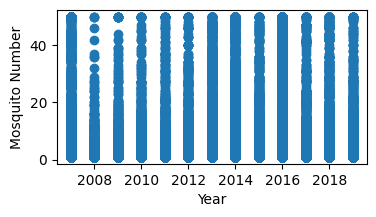

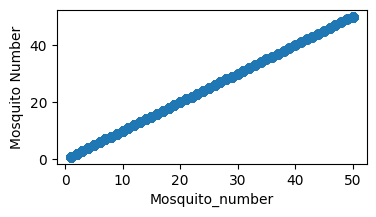

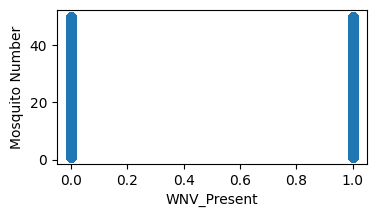

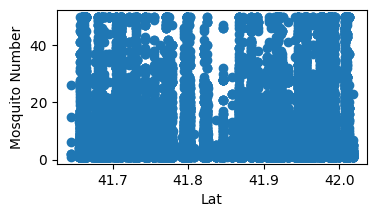

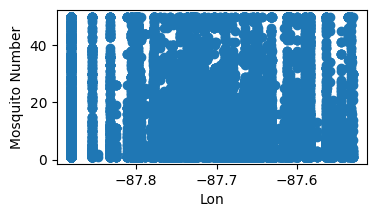

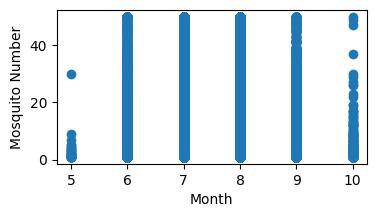

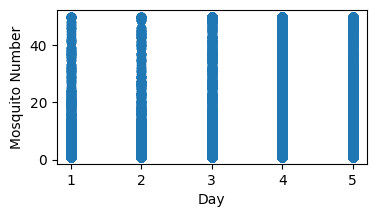

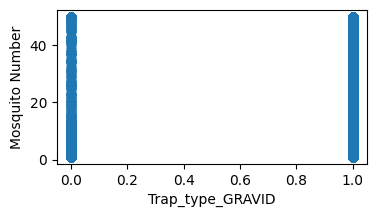

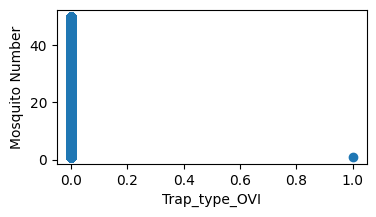

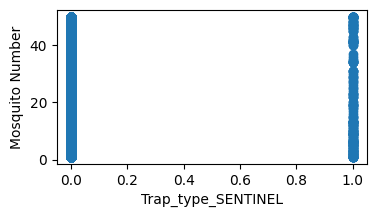

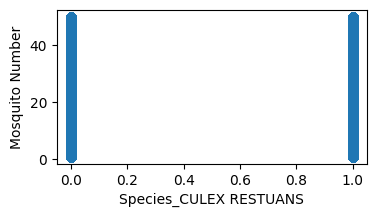

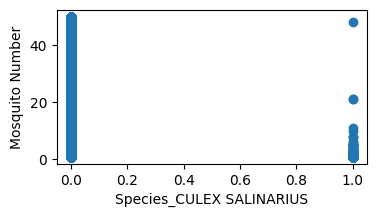

In [28]:
# Create scatter plots between each independent variable and the dependent variable
for col in X.columns:
    plt.figure(figsize=(4, 2))  
    plt.plot(X[col], y, marker='o', linestyle='None')  
    plt.ylabel('Mosquito Number')  
    plt.xlabel(col)  
    plt.show()  

### Summary so far:

Next, we will be performing linear regression on our dataset to determine how certain independent variables can affect something like the number of mosquitos caught. As well, we will be performing logistic regression to determine how the certain independent variables affect the presence of West Nile Virus in mosquitos in the Chicago area. So far we have cleaned and prepared out dataset a certain way with two of cour categories, ('Trap Type & 'Species') being one hot encoded with numeric dummy variables in order for our regressions to work. We also extracted important features from our datetime 'Date' column in order to better perform the regressions. 

As well we did some analysis to see which of our independent variables correlated, either positively or negatively with our dependent variable of Mosquito_number. We determined that most variables are very weakly correlated to our dependent variable indicating a potential weak linear relationship. 

Next, we will check to see if the independent variables are independent of each other (no single or multicollinearity) and each is identically distributed. Since we have been told the this dataset does not hold up well VIF, lets start with the heatmap below to get a good visual of the correlation between variables.

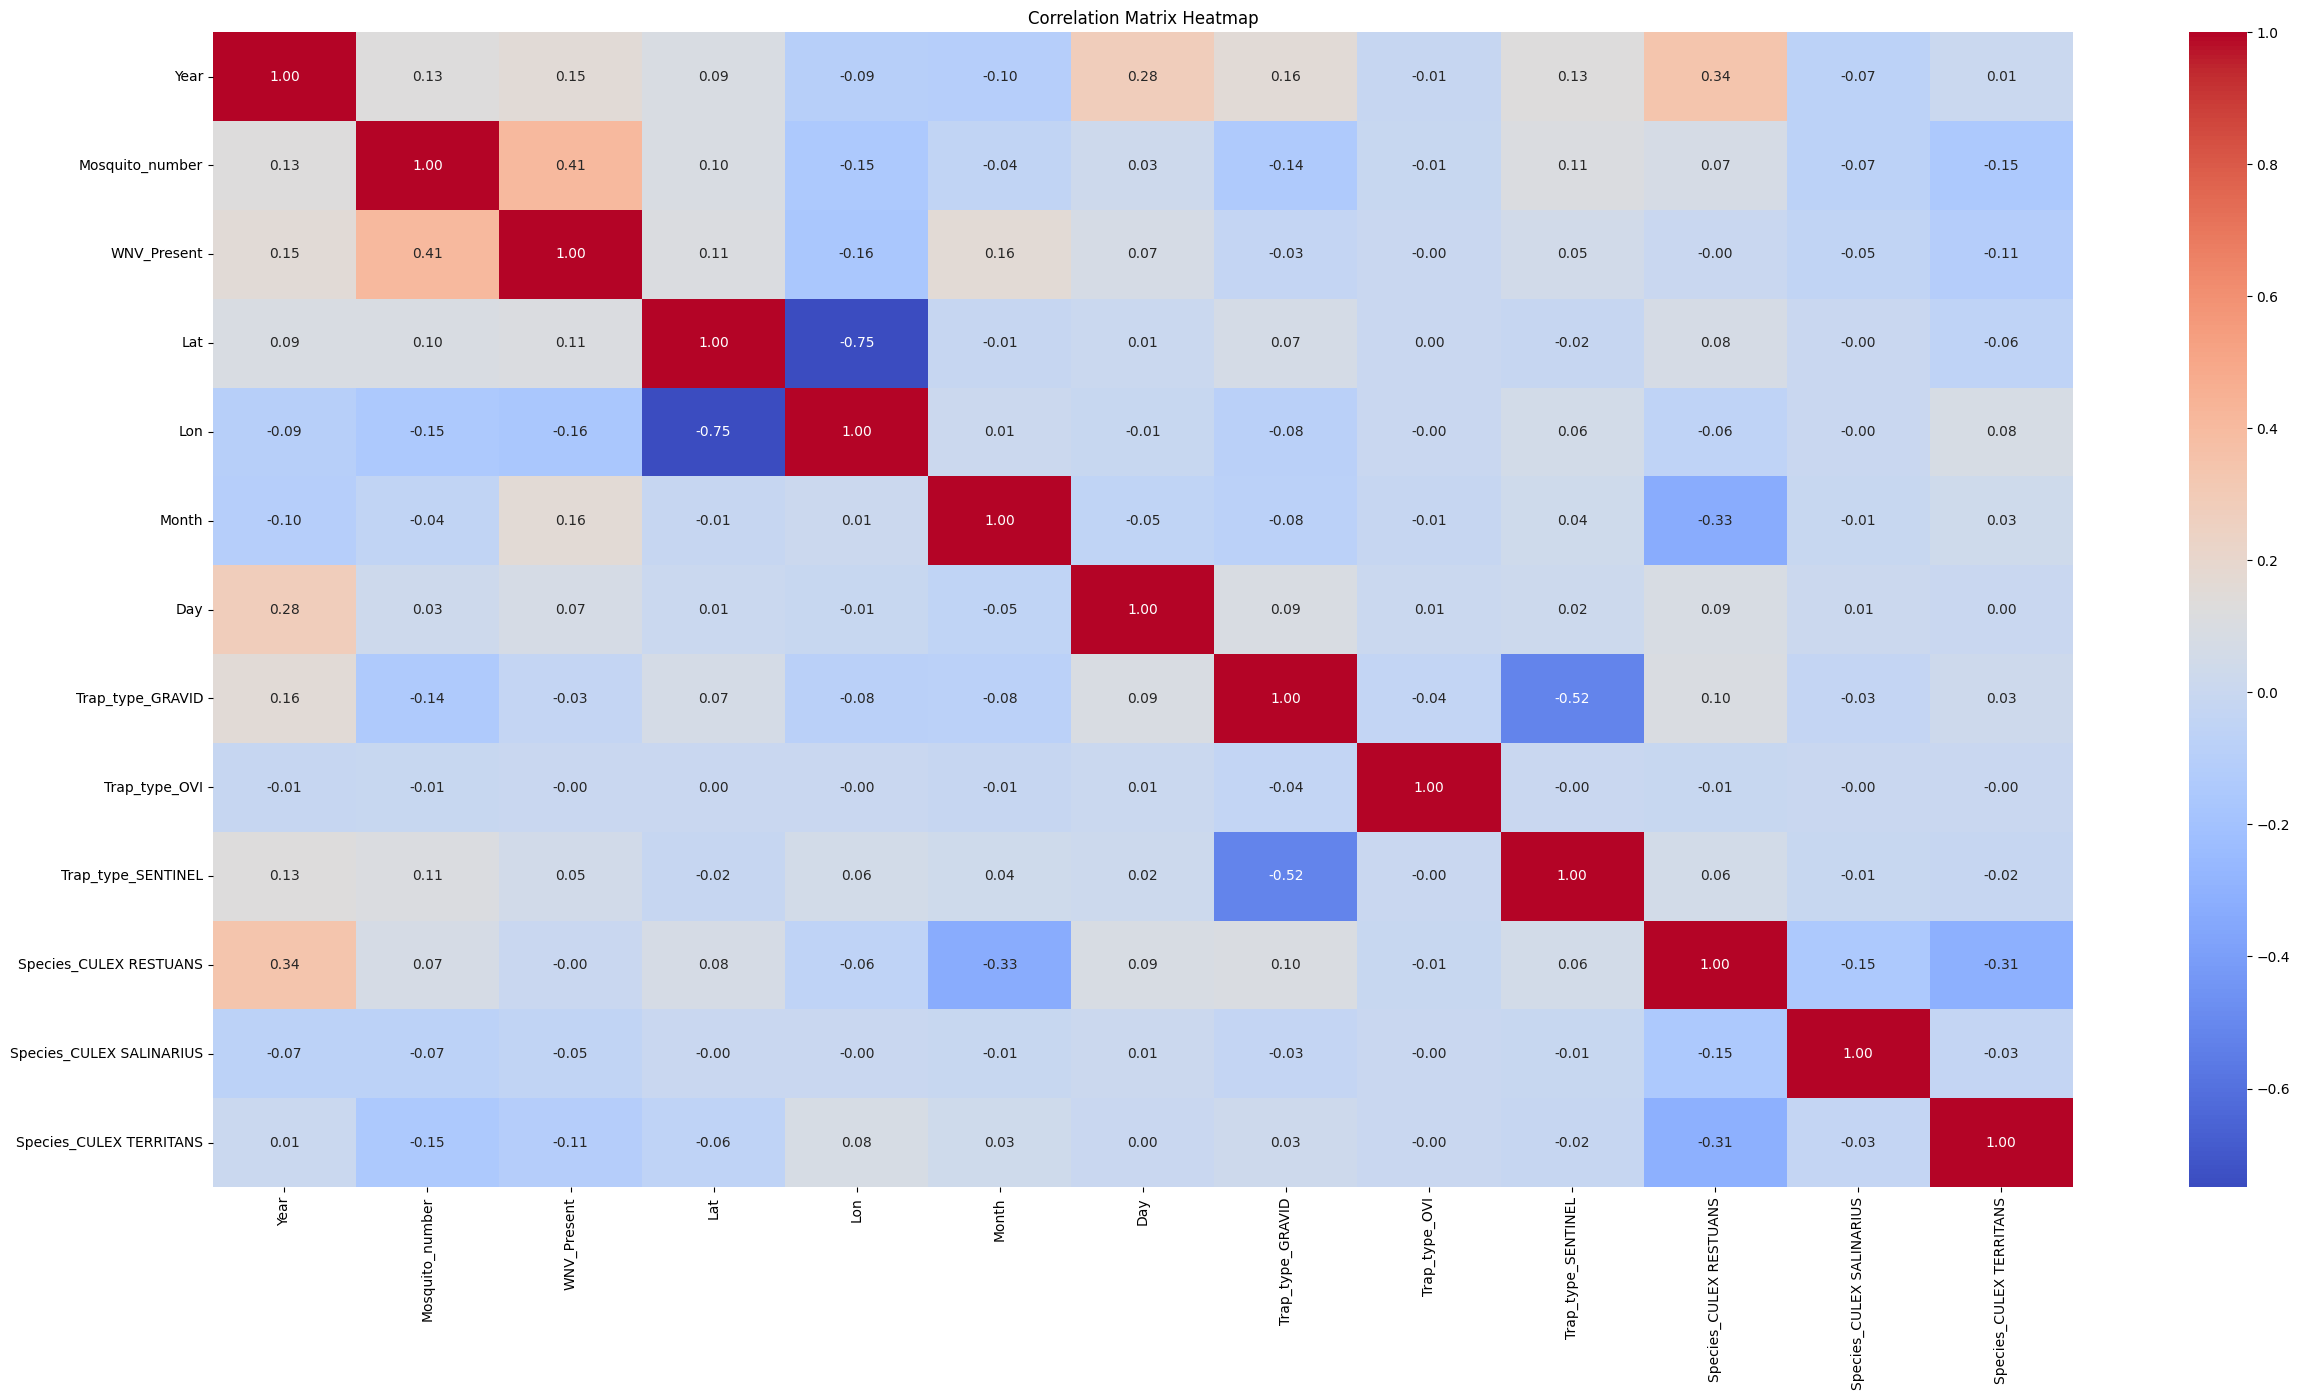

In [29]:
# Compute the correlation matrix
correlation_matrix = df2.corr()

# Create a mask for the upper triangular part of the correlation matrix
mask = np.triu(correlation_matrix)

# Create the heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

From our heatmap we can see that outside of Mosquito_number there is potential multicollinearity between Lattitude and Longitude, lets keep this in mind with out model later. As well, we see slight rises in correaltion between the following:

- Year & Day

- Year & Species Culex Restuans

- Month & Species Culex Restuans

- Trap type Gravid and Trap Type Sentinel

- Species Culex Restuans & Species Culex Territans

So over all lets keep and eye out for the following variables:

- Year

- Species Culex Restuans

- Lat & Lon

### Part 3. Advanced Statistical Analysis

**Question 1.** Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.

We are instructed to leave out WNV_Present and from our dataset so lets include that in our .drop along with our dependent variable, otherwise lets start with everything else to get a look at the big picture.

### Model 1


In [30]:
# Select the independent variables (features) and dependent variable
X2 = df2.drop(['Mosquito_number', 'WNV_Present'], axis = 1)  # Replace the column names with the desired independent variables
y2 = df2['Mosquito_number']  # Replace 'dependent_var' with the actual dependent variable column name

# Add a constant term to the independent variables
X2 = sm.add_constant(X2)


# Create and fit the linear regression model
model = sm.OLS(y2, X2)
results = model.fit()
# Print the summary of the final regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     171.2
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:43:23   Log-Likelihood:                -73448.
No. Observations:               18495   AIC:                         1.469e+05
Df Residuals:                   18483   BIC:                         1.470e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We can see right off the bat there are some issues:

- Low adj. R-squared score

- Unrealistic const coefficient (we cant have negative mosquito number)

- 3 varaibles with statistically insignificant p-values: 'Day', 'Trap_type_OVI', and 'Trap_type_SENTINEL' is just on the edge.

- A note declaring a large condition number, likely indicating strong multicollinearity problems. 

Lets begin our iterative process by pruning some of the potential flags for multicollinearity we mentioned earlier, let start with the largest first, 'Lat' 7 'Lon'. This will take away the potential for geospatial locations being a factor in our count of mosquitos.




### Model 2

In [31]:
# Drop the 'Lat' and 'Lon' columns
X2 = df2.drop(['Mosquito_number', 'WNV_Present','Lat','Lon'], axis = 1)  
y2 = df2['Mosquito_number'] 

X2 = sm.add_constant(X2)


model = sm.OLS(y2, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     159.0
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          3.07e-291
Time:                        20:43:23   Log-Likelihood:                -73656.
No. Observations:               18495   AIC:                         1.473e+05
Df Residuals:                   18485   BIC:                         1.474e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We are still getting red flags here:

- Low adj R-squared

- Strong Multicollinearity indicators, they have decreased however, maybe on the right track.

- Unrealistic coefficients

Lets prune again with the next biggest collinearity varibale, not necessarily in size but in quanity, 'Species_CULEX RESTUANS' popped up three times in our correlation matrix as having potential high multicollinearity issues, lets drop it and see the results.

### Model 3

In [32]:
# Drop 'Species_CULEX RESTUANS' column
X2 = df2.drop(['Mosquito_number', 'WNV_Present','Lat','Lon','Species_CULEX RESTUANS'], axis = 1)  
y2 = df2['Mosquito_number']  

X2 = sm.add_constant(X2)


model = sm.OLS(y2, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          2.49e-286
Time:                        20:43:23   Log-Likelihood:                -73670.
No. Observations:               18495   AIC:                         1.474e+05
Df Residuals:                   18486   BIC:                         1.474e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Still more issues, lets take out the last big multicollinearity flag, 'Year', from before and see where we are:

### Model 4

In [33]:
# Drop 'Year' column
X2 = df2.drop(['Mosquito_number', 'WNV_Present','Lat','Lon','Species_CULEX RESTUANS','Year'], axis = 1)  
y2 = df2['Mosquito_number']  
X2 = sm.add_constant(X2)


model = sm.OLS(y2, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     146.8
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          1.17e-211
Time:                        20:43:23   Log-Likelihood:                -73845.
No. Observations:               18495   AIC:                         1.477e+05
Df Residuals:                   18487   BIC:                         1.478e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Ok, so we are definitely getting better results here, however we still are getting that multicollinearity note and or adjusted R2 is still extremely low. We dont have much else on our correlation matrix to base it off of so lets try taking out the variable with the high p-value, 'Trap_type_OVI'.

### Model 5

In [34]:
# Drop 'Trap_type_OVI' column
X2 = df2.drop(['Mosquito_number', 'WNV_Present','Lat','Lon','Species_CULEX RESTUANS','Year','Trap_type_OVI'], axis = 1)  
y2 = df2['Mosquito_number']  

X2 = sm.add_constant(X2)


model = sm.OLS(y2, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     170.8
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          2.69e-212
Time:                        20:43:23   Log-Likelihood:                -73846.
No. Observations:               18495   AIC:                         1.477e+05
Df Residuals:                   18488   BIC:                         1.478e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [35]:
# Drop 'Trap_type_OVI' column
X2 = df2.drop(['Mosquito_number', 'WNV_Present','Lat','Lon','Species_CULEX RESTUANS','Year','Trap_type_OVI','Month'], axis = 1)  
y2 = df2['Mosquito_number']  

X2 = sm.add_constant(X2)


model = sm.OLS(y2, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Mosquito_number   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     196.5
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          9.43e-205
Time:                        20:43:23   Log-Likelihood:                -73866.
No. Observations:               18495   AIC:                         1.477e+05
Df Residuals:                   18489   BIC:                         1.478e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We know have a model that is not showing multi-collinearity however we have such a small amount of features, our adjust r2 is extremely low and our coeeficients are better but maybe still not all that realistic. It is starting to look like our dataset is not a good fit for a linear regression model but lets do two more things to get a closer look at whats going on:

- Check to see if our residuals are normally distributed 

- Check to see if the variance of residuals is consitent across the entire range of data (homoskedasticity).

### Residual Distribution Check:

In [36]:
# Assign the residuals and fitted values of the linear regression model
model_resids = results.resid  # Residuals of the model
model_fittedvals = results.fittedvalues  # Fitted values of the model

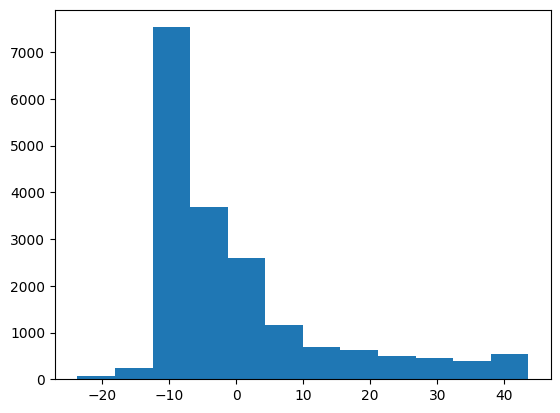

In [37]:
plt.figure()  # Create a new figure
plt.hist(model_resids, bins=12)  # Plot a histogram of the model residuals with 12 bins
plt.show()  # Display the histogram

We can easily tell here the residuals do not look normally distributed, inf fact we see a strong left skew of the data. lets run a shapiro-wilkes test to further asses the normaility of the distribution.

In [38]:
tstat, pval = stats.shapiro(model_resids)  # Perform Shapiro-Wilk test on the model residuals
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))  # Print the p-value

Shapiro-Wilk test on residuals: p-value = 0.000


/Users/williamfussell/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


With a p-value of 0.000 from ourt Shapiro-Wilkes tes we have even further evidence that our data is not normally distributed. Lets try a Q plot or a (prob plot) to hammer the final nail in our hyptothesis of normal distribution. If our points align on a 45 degree axis then our data is normally distributed or nearly normally didstributed.

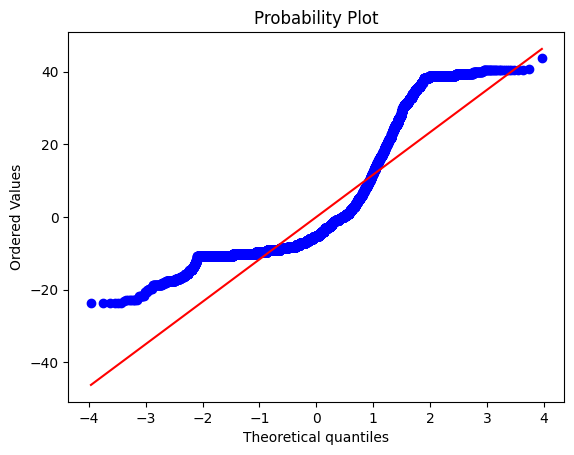

In [39]:
plt.figure()  # Create a new figure
stats.probplot(model_resids, dist="norm", plot=plt)  # Create a probability plot of the model residuals
plt.show()  # Display the plot

We can see that the plot above further proves our point of the data being skewed to the left. So we are violating one of the assumptions of linear regression here. Our residuals are not normally distributed. Lets test to see the consitancy of our residuals. We will want to see a very random pattern when the residuals are plotted in a scatter plot.

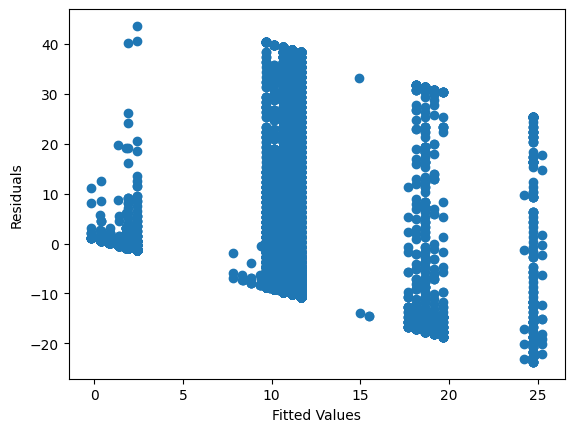

In [40]:
plt.figure()  # Create a new figure
plt.scatter(model_fittedvals, model_resids)  # Plot the residuals against the fitted values
plt.xlabel('Fitted Values')  # Set the x-axis label
plt.ylabel('Residuals')  # Set the y-axis label
plt.show()  # Display the plot

Here we see a very unusual pattern in our residuals, this is not good. It is downward sloping and grouped into bar like shapes. 

### Summary of Linear Regression Model

At the end of our testing here, I believe that we can confirm our initial suspitions in that our dataset may not be a good fit for a linear regression model. Here is what we learned:
- From the beginning we saw very little evidence of a linear pattern when comparing the dependent variable against the independent variables. 

- We looked at our correlation matrix and saw multiple potential multicollinearity problems. 

- Ran our model on all variables to start and got unsatifactory results

- Pruned the model until there were no more multicollinear issues

- Pruned the model of the final high p-value

Our final model, with the most realistic coefficients was hacked to pieces at the end and it seemed likely that our model was not working, so we did two checks to make sure we could confirm our hypothesis:

- Our residuals were not normally distributed, infact we saw a strong skew to the left.

- Our residuals showed a downward sloping pattern and were grouped into bar like shapes.



### Final Assumptions on Linear Regression:


I believe that multi-variable Linear Regression may not be the best model choice for our dataset and that we may need to try other non-linear models to find the answer to how to predict how many mosquitos can be caught based on our variables.

**Question 2.** Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations.

In [41]:
# Create new dataframe with the independent variables from the original dataset for Logistic Regression
dflog = df2

After out unsuccessfull Linear Regression lets try a regression model now with the WNV_Present column as our dependent variable and the rest as independent.

We have our dataframe set up already from before, lets run some tests on our data again to look for multicollinearity.


In [42]:
dflog.head()

,Year,Mosquito_number,WNV_Present,Lat,Lon,Month,Day,Trap_type_GRAVID,Trap_type_OVI,Trap_type_SENTINEL,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TERRITANS
0,2019,2,0,41.977738,-87.880969,9,4,1,0,0,1,0,0
1,2019,1,0,41.798211,-87.736925,9,4,1,0,0,1,0,0
2,2019,2,0,41.987245,-87.689417,9,4,1,0,0,1,0,0
3,2019,1,0,41.953664,-87.724987,9,4,1,0,0,1,0,0
4,2019,9,0,41.657069,-87.546049,9,4,1,0,0,1,0,0


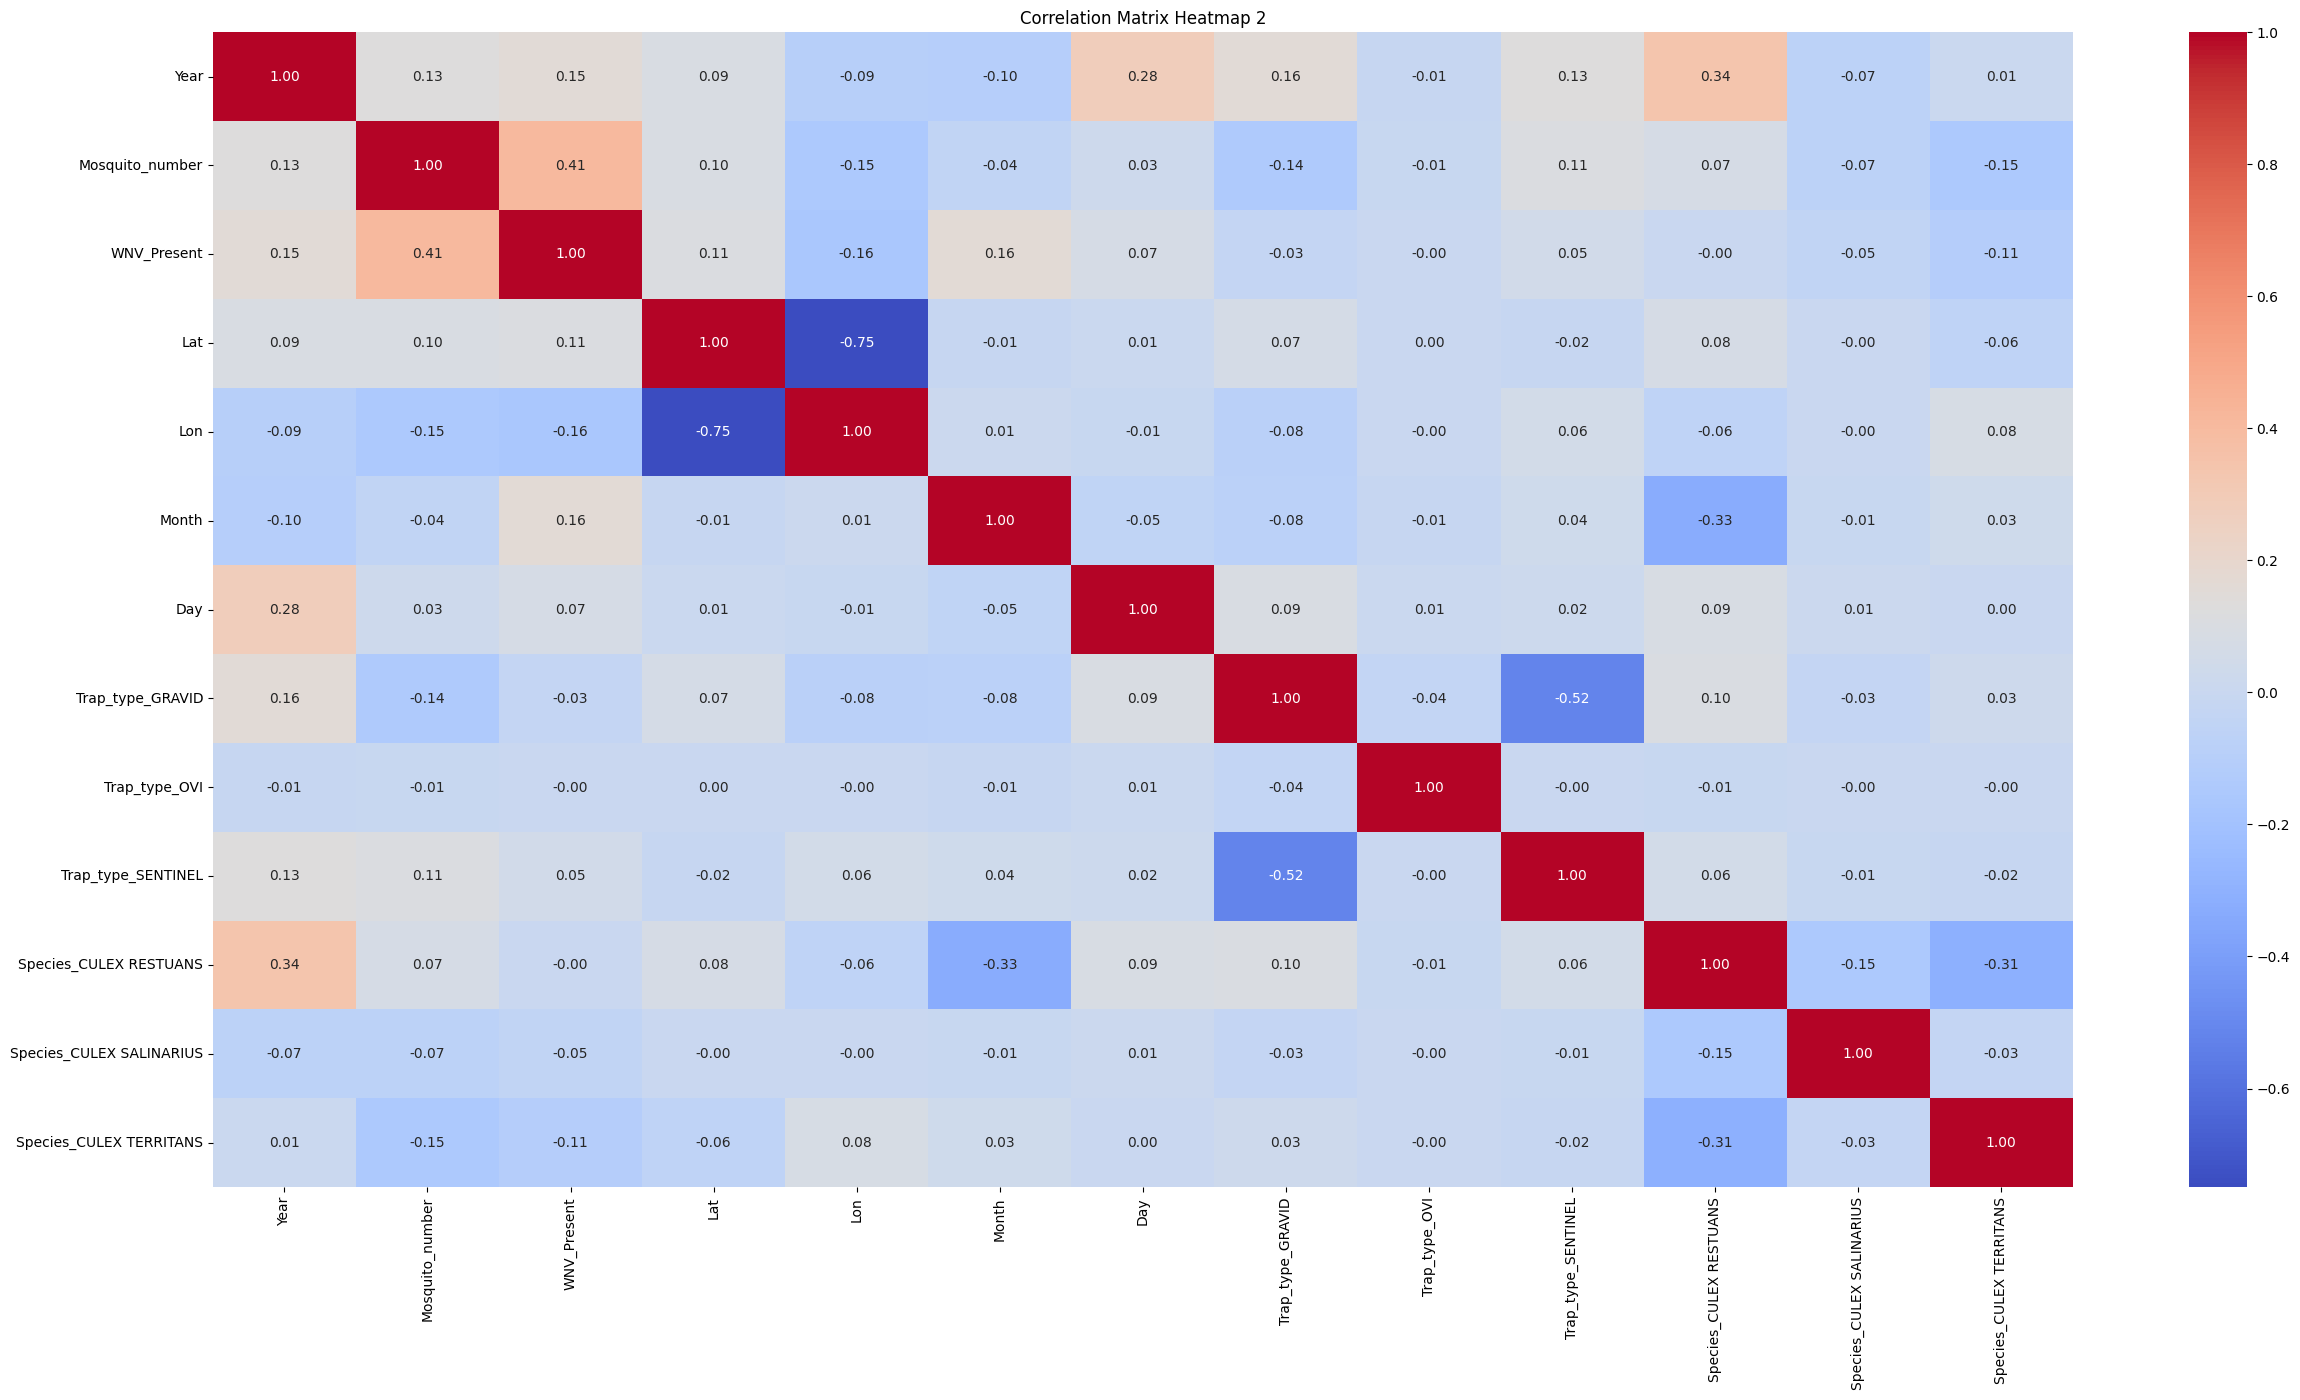

In [43]:
correlation_matrix2 = dflog.corr()  # Compute the correlation matrix
mask = np.triu(correlation_matrix2)  # Create a mask for the upper triangular part of the correlation matrix

# Create the heatmap
plt.figure(figsize=(30, 15))  # Create a large figure
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f')  # Plot the correlation matrix as a heatmap
plt.title('Correlation Matrix Heatmap 2')  # Set the title of the heatmap
plt.show()  # Display the heatmap

We knew we would see some multicollinearity as its the same dataset from before.Lets start with everything however just to get a look and then begin an iterative process trying to find a model with the higest accuracy.

### Model 1


In [44]:
X3 = dflog.drop('WNV_Present', axis=1)  # Select the independent variables (features)
Y3 = dflog['WNV_Present']  # Select the dependent variable

X3_const = sm.add_constant(X3)  # Add a constant term to the independent variables

bank_logit = sm.Logit(Y3, X3_const)  # Create a logistic regression model
bank_logit_fitted = bank_logit.fit()  # Fit the logistic regression model to the data
bank_logit_fitted.summary()  # Print the summary of the logistic regression results

         Current function value: 0.405290
         Iterations: 35


/Users/williamfussell/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV_Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18482
Method:                           MLE   Df Model:                           12
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                  0.2232
Time:                        20:43:24   Log-Likelihood:                -7495.8
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -517.7120     25.178    -20.562      0.000    -567.060    -468.364
Year                         0.1119      0.007     16.273      0.000       0.098       0.125
Mosquito_number              0.0648      0.001     44.587      0.000       0.062       0.068
Lat                         -0.6228      0.287     -2.172      0.030      -1.185      -0.061
Lon                         -3.5441      0.335    -10.575      0.000      -4.201      -2.887
Month                        0.6246      0.024     25.750      0.000       0.577       0.672
Day                          0.1562      0.024      6.592      0.000       0.110       0.203
Trap_type_GRAVID             0.1377      0.132      1.046      0.295      -0.120       0.396
Trap_type_OVI              -14.1781   6902.355     -0.002      0.998   -1.35e+04    1.35e+04
Trap_type_SENTINEL          -0.2215      0.214     -1.034      0.301      -0.641       0.198
Species_CULEX RESTUANS      -0.2845      0.051     -5.577      0.000      -0.385      -0.185
Species_CULEX SALINARIUS    -1.0474      0.322     -3.252      0.001      -1.679      -0.416
Species_CULEX TERRITANS     -2.5157      0.274     -9.165      0.000      -3.054      -1.978
============================================================================================
"""

We are getting some warning here about Convergence, signalling potential issues with the data. Before we dive deeper into our data lets think logistically and critically about what we are looking for not just with numbers.

We are looking for the potential of finding WNV based on our features. Do any of our features seem out of place, or that they likely would have no impact on the prevalence of WNV. Off the top of my head, I see 'Trap Type' and think that these would not have much or any affect on detecting WNV, just the amount of mosquitos caught, surely trap type wouldnt have much affect on whether mosquito caught has WNV or not. We also see that their p-values are all too, furthering our assumption. Lets run an accuracy test, drop them and see what happens.

In [45]:
y_proba = bank_logit_fitted.predict(X3_const)  # Calculate the predicted probabilities
y_pred = np.where(y_proba >= 0.5, 1, 0)  # Convert the probabilities to binary predictions using a threshold of 0.5

num_correct = (y_pred == Y3).sum()  # Count the number of correctly predicted instances
pct_accuracy = num_correct / X3.shape[0]  # Calculate the percentage accuracy

print(f'Baseline Accuracy: {np.round(pct_accuracy * 100.0, 3)}%')  # Print the baseline accuracy as a percentage

Baseline Accuracy: 81.363%


### Model 2

In [46]:
# Drop all 'Trap_type' columns
X3 = dflog.drop(['WNV_Present','Trap_type_GRAVID','Trap_type_OVI','Trap_type_SENTINEL',], axis=1)
Y3 = dflog['WNV_Present']

X3_const = sm.add_constant(X3)

bank_logit = sm.Logit(Y3, X3_const)
bank_logit_fitted = bank_logit.fit()
bank_logit_fitted.summary()

Optimization terminated successfully.
         Current function value: 0.405442
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV_Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                  0.2229
Time:                        20:43:25   Log-Likelihood:                -7498.6
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -524.1096     24.749    -21.177      0.000    -572.617    -475.603
Year                         0.1118      0.007     16.866      0.000       0.099       0.125
Mosquito_number              0.0642      0.001     45.301      0.000       0.061       0.067
Lat                         -0.6318      0.286     -2.207      0.027      -1.193      -0.071
Lon                         -3.6252      0.333    -10.875      0.000      -4.279      -2.972
Month                        0.6197      0.024     25.666      0.000       0.572       0.667
Day                          0.1587      0.024      6.713      0.000       0.112       0.205
Species_CULEX RESTUANS      -0.2844      0.051     -5.586      0.000      -0.384      -0.185
Species_CULEX SALINARIUS    -1.0650      0.323     -3.296      0.001      -1.698      -0.432
Species_CULEX TERRITANS     -2.5124      0.274     -9.154      0.000      -3.050      -1.974
============================================================================================
"""

Ok, so we have dropped all of our high-pvalues, lets run an accuracy test and see.

In [47]:

y_proba = bank_logit_fitted.predict(X3_const)
y_pred = np.where(y_proba >= 0.5, 1, 0)

num_correct = (y_pred == Y3).sum()
pct_accuracy = num_correct/X3.shape[0]

print(f'Baseline Accuracy: {np.round(pct_accuracy * 100.0, 3)}%')

Baseline Accuracy: 81.384%


Our accuracy is ever so slightly better, but i want to take one step back and see if dropping our high multicollinear varaible of 'Lat' from before will fix our problem. So i will add back the trap_type and take out 'Lat'.

### Model 3

In [48]:
# Add back 'Trap type' columns and drop 'Lat' column
X3 = dflog.drop(['Lat','WNV_Present'], axis=1)
Y3 = dflog['WNV_Present']

X3_const = sm.add_constant(X3)

bank_logit = sm.Logit(Y3, X3_const)
bank_logit_fitted = bank_logit.fit()
bank_logit_fitted.summary()

         Current function value: 0.405418
         Iterations: 35


/Users/williamfussell/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV_Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18483
Method:                           MLE   Df Model:                           11
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                  0.2229
Time:                        20:43:25   Log-Likelihood:                -7498.2
converged:                      False   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -494.6245     22.794    -21.700      0.000    -539.299    -449.950
Year                         0.1118      0.007     16.258      0.000       0.098       0.125
Mosquito_number              0.0648      0.001     44.597      0.000       0.062       0.068
Lon                         -2.9862      0.214    -13.922      0.000      -3.407      -2.566
Month                        0.6237      0.024     25.721      0.000       0.576       0.671
Day                          0.1569      0.024      6.619      0.000       0.110       0.203
Trap_type_GRAVID             0.1224      0.131      0.933      0.351      -0.135       0.379
Trap_type_OVI              -14.1835   6902.791     -0.002      0.998   -1.35e+04    1.35e+04
Trap_type_SENTINEL          -0.2512      0.213     -1.177      0.239      -0.670       0.167
Species_CULEX RESTUANS      -0.2887      0.051     -5.661      0.000      -0.389      -0.189
Species_CULEX SALINARIUS    -1.0433      0.322     -3.241      0.001      -1.674      -0.412
Species_CULEX TERRITANS     -2.5208      0.274     -9.184      0.000      -3.059      -1.983
============================================================================================
"""

We still have our p-value problem and our note is back, lets take them all out and see what happens:

### Model 4

In [49]:
# Drop 'Trap type' columns and add 'Lat' column
X3 = dflog.drop(['Lat','WNV_Present','Trap_type_GRAVID','Trap_type_OVI','Trap_type_SENTINEL',], axis=1)
Y3 = dflog['WNV_Present']

X3_const = sm.add_constant(X3)

bank_logit = sm.Logit(Y3, X3_const)
bank_logit_fitted = bank_logit.fit()
bank_logit_fitted.summary()

Optimization terminated successfully.
         Current function value: 0.405574
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV_Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18486
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                  0.2226
Time:                        20:43:25   Log-Likelihood:                -7501.1
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -500.1236     22.200    -22.528      0.000    -543.634    -456.613
Year                         0.1115      0.007     16.819      0.000       0.098       0.124
Mosquito_number              0.0642      0.001     45.317      0.000       0.061       0.067
Lon                         -3.0589      0.212    -14.428      0.000      -3.474      -2.643
Month                        0.6187      0.024     25.635      0.000       0.571       0.666
Day                          0.1592      0.024      6.735      0.000       0.113       0.206
Species_CULEX RESTUANS      -0.2891      0.051     -5.682      0.000      -0.389      -0.189
Species_CULEX SALINARIUS    -1.0608      0.323     -3.285      0.001      -1.694      -0.428
Species_CULEX TERRITANS     -2.5176      0.274     -9.173      0.000      -3.055      -1.980
============================================================================================
"""

Ok, so we now have a good look model it seems. Lets try a test.

In [50]:

y_proba = bank_logit_fitted.predict(X3_const)
y_pred = np.where(y_proba >= 0.5, 1, 0)

num_correct = (y_pred == Y3).sum()
pct_accuracy = num_correct/X3.shape[0]

print(f'Baseline Accuracy: {np.round(pct_accuracy * 100.0, 3)}%')

Baseline Accuracy: 81.325%


Not bad, we are still sticking around the same accuracy score. Lets do a bit of back and forth with the feature selection see if we can gain a better or same level of accuracy with less features.

### Model 5

In [51]:
# Drop 'Lon' column
X3 = dflog.drop(['Lat','WNV_Present','Trap_type_GRAVID','Trap_type_OVI','Trap_type_SENTINEL','Lon'], axis=1)
Y3 = dflog['WNV_Present']

X3_const = sm.add_constant(X3)

bank_logit = sm.Logit(Y3, X3_const)
bank_logit_fitted = bank_logit.fit()
bank_logit_fitted.summary()

Optimization terminated successfully.
         Current function value: 0.411250
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV_Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18487
Method:                           MLE   Df Model:                            7
Date:                Sun, 02 Jul 2023   Pseudo R-squ.:                  0.2118
Time:                        20:43:26   Log-Likelihood:                -7606.1
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -246.3531     13.234    -18.616      0.000    -272.290    -220.416
Year                         0.1187      0.007     18.035      0.000       0.106       0.132
Mosquito_number              0.0659      0.001     46.883      0.000       0.063       0.069
Month                        0.6090      0.024     25.447      0.000       0.562       0.656
Day                          0.1516      0.024      6.382      0.000       0.105       0.198
Species_CULEX RESTUANS      -0.2752      0.051     -5.419      0.000      -0.375      -0.176
Species_CULEX SALINARIUS    -0.9864      0.324     -3.049      0.002      -1.621      -0.352
Species_CULEX TERRITANS     -2.5700      0.274     -9.367      0.000      -3.108      -2.032
============================================================================================
"""

In [52]:

y_proba = bank_logit_fitted.predict(X3_const)
y_pred = np.where(y_proba >= 0.5, 1, 0)

num_correct = (y_pred == Y3).sum()
pct_accuracy = num_correct/X3.shape[0]

print(f'Baseline Accuracy: {np.round(pct_accuracy * 100.0, 3)}%')

Baseline Accuracy: 81.027%


I know feel confident with my model at a 81.027% accuracy. 

Over all, I feel that this model worked well for logistic regression, however, I have doubts about all the features and their ability to work properly as a linear model. This is brought to attention the most in the Linear Regression as almost all of our assumptions of linear relationships have disappeared.


I think it would be wise to dig further into non-linear models to get better results...but that is to come!